# Методы оптимизации
## Лабораторная работа №1 
### (Вариант №16) 

### Выполнил: студент ИДБ-18-09 Димитриев А.В.

### Цель работы
Изучение методов безусловной одномерной оптимизации, применение их на практическом примере. <br>Сравнить различные алгоритмы по эффективности на тестовых примерах.

### Порядок выполнения работы:
1. Найти аналитическое решение задачи $\min_{x \in [a, b]} f(x)$.
2. Исследовать их сходимость и провести сравнение по числу вычислений функции для достижения заданной точности.

### Пример
функция: $f(x)=3(5-x)^{4/3} + 2x^2$<br>
Начальный интервал неопределенности $L = [1.5; 2]$<br>
Точность $\varepsilon = 0.025$

In [1]:
from math import log, sqrt
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def func(x: float) -> float:
    return 2 + 5 * x - 10 * x**2 + 5 * x**3 - x**5

In [3]:
def plotDraw(func: callable) -> None:
    x = np.linspace(1.5, 2, 100)
    y = np.array([func(x_i) for x_i in x])
    plot = plt.figure()
    plt.grid()
    plt.plot(x, y, 'g')

#### График данной функции на интервале $[1.5; 2]$

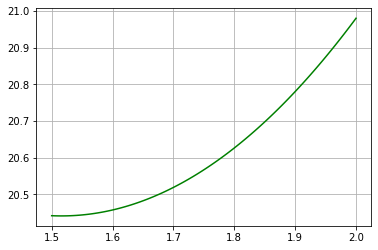

In [4]:
plotDraw(func)

### Аналитическое решение задачи 

<b>Необходимое условие экстремума функции:</b><br>
$f'(x)=0$<br>
$f'(x)=4x - 4(5-x)^{1/3}=0$<br>
$x^{*}$ = $1.516$<br>
<b>Достаточное условие экстремума функции:</b><br>
Если $f(x)$ дважды дифференцируема на данном интервале, тогда:<br>
    Если $f''(x^*)>0$, то $x^*$ - точка локального (глобального) минимума. <br>
    Если $f''(x^*)<0$, то $x^*$ - точка локального (глобального) максимума.<br>
$f''(x)=4+\frac{4}{3 * (5-x)^{2/3}}$<br>
$f''(1.516) = 4.58 > 0$, следовательно, $x^* = 1.516$ - точка минимума.

### Решение примера  с помощью программного метода

In [3]:
INTERVAL = (-3, -2)
ACCURACY = 0.01

#### Метод дихотомии

In [9]:
def dicht(func: callable, interval: tuple, accuracy: float) -> tuple:
    a, b = interval
    offset = accuracy / 2
    k = 0
    
    while True:
        offset /= 2
        if abs(b - a) <= accuracy:
            return ( (a + b) / 2, k)
        l = (a + b) / 2 - offset / 2
        func_l = func(l)
        m = (a + b) / 2 + offset / 2
        func_m = func(m)
        k += 2
        
        if func_l <= func_m:
            b = m
        else:
            a = l

In [10]:
solution, k = dicht(func, INTERVAL, ACCURACY)
dichotomy_convergence = 1 / 2 ** (k / 2)

In [11]:
print(f"Приближенное решение: {round(solution, 5)}", f"Количество вычислений функции: {k}", sep='\n')
print(f"Сходимость метода дихотомии при вычислении функции {k} раз: {dichotomy_convergence}")

Приближенное решение: -2.23149
Количество вычислений функции: 14
Сходимость метода дихотомии при вычислении функции 14 раз: 0.0078125


#### Метод золотого сечения

In [9]:
def golden(func: callable, interval: tuple, accuracy: float) -> tuple:
    a, b = interval
    y = a + (3 - sqrt(5)) * (b - a) / 2
    z = a + b - y
    func_y = func(y)
    func_z = func(z)
    k = 1
    flag = False 
    
    while True:
        if flag:
            func_z = func_y
            func_y = func(y)
        elif k != 1:
            func_y = func_z
            func_z = func(z)
        k += 1
        
        if func_y <= func_z:
            flag = True
            b = z
            z = y
            y = a + b - y
        else:
            flag = False
            a = y
            y = z
            z = a + b - z
        if abs(a - b) <= accuracy:
            return ((a + b) / 2, k)

In [10]:
solution, k = golden(func, INTERVAL, ACCURACY)
golden_ratio_convergence = 0.618 ** (k - 1)

In [11]:
print(f"Приближенное решение: {round(solution, 5)}", f"Количество вычислений функции: {k}", sep='\n')
print(f"Сходимость метода золотого сечения при вычислении функции {k} раз: {round(golden_ratio_convergence, 5)}")

Приближенное решение: 1.51925
Количество вычислений функции: 8
Сходимость метода золотого сечения при вычислении функции 8 раз: 0.03443


#### Метод Фибоначчи

In [12]:
def fibonacci(func: callable, interval: tuple, accuracy: float, alpha=0.0125) -> tuple:
    a = [interval[0]]
    b = [interval[1]]
    k = 1
    fib_nums = [1, 1]
    
    while fib_nums[-1] <= abs(b[-1] - a[-1]) / accuracy:
        fib_nums.append(fib_nums[-1] + fib_nums[-2])
        
    n = len(fib_nums) - 1
    l = [a[-1] + fib_nums[n - k - 1] * (b[-1] - a[-1]) / fib_nums[n - k + 1]]
    m = a[-1] + fib_nums[n - k] * (b[-1] - a[-1]) / fib_nums[n - k + 1]
    func_l = func(l[-1])
    func_m = func(m)
    k_ = 2
    
    while k != n - 2:
        if func_l > func_m:   
            a.append(l[k - 1])
            b.append(b[k - 1])
            l.append(m)
            m = a[-1] + fib_nums[n - k - 1] * (b[-1] - a[-1]) / fib_nums[n - k]
            func_m = func(m)
        else:
            a.append(a[k - 1])
            b.append(m)
            m = l[-1]
            l.append(a[-1] + fib_nums[n - k - 2] * (b[-1] - a[-1]) / fib_nums[n - k])
            func_l = func(l[-1])
            
        k += 1
        k_ += 1
        
    m = l[-2] + alpha
    func_l = func(l[-2])
    func_m = func(m)
    k_ += 2
    
    if func_l > func_m:
        a[-1] = l[-2]
        b[-1] = b[-2]
    else:
        a[-1] = a[-2]
        b[-1] = l[-2]
    
    return ((a[-1] + b[-1]) / 2, k_)

In [13]:
solution, k = fibonacci(func, INTERVAL, ACCURACY)
fib_nums = [1, 1]
for i in range(k - 2):
    fib_nums.append(fib_nums[-1] + fib_nums[-2])
fib_k = fib_nums[-1]
fibonacci_convergence = 1 / fib_k

In [14]:
print(f"Приближенное решение: {round(solution, 5)}", f"Количество вычислений функции: {k}", sep='\n')
print(f"Сходимость метода Фибоначчи при вычислении функции {k} раз: {round(fibonacci_convergence, 5)}")

Приближенное решение: 1.52381
Количество вычислений функции: 8
Сходимость метода Фибоначчи при вычислении функции 8 раз: 0.04762


## Выводы:
1. Количество вычислений функции в методе дихотомии было 10, тогда как в других методах по 8.
2. У метода дихотомии  - наименьшая сходимость, следовательно, в примере этот метод сходится быстрее, чем метод золотого сечения и метода Фибоначчи. 
3. Метод Фибоначчи в примере сходился медленнее других методов.
4. Самым точным методом оказался метод золотого сечения.
